### Salary prediction

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#!this libraries for model prediction
#this for splitting data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#rate model performance and errors
from sklearn .metrics import mean_squared_error,r2_score,mean_absolute_error

import warnings 
warnings.filterwarnings('ignore')

In [30]:
data=pd.read_csv('Salary_Data.csv')
data.head()
# data.shape

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Figure size 300x300 with 0 Axes>

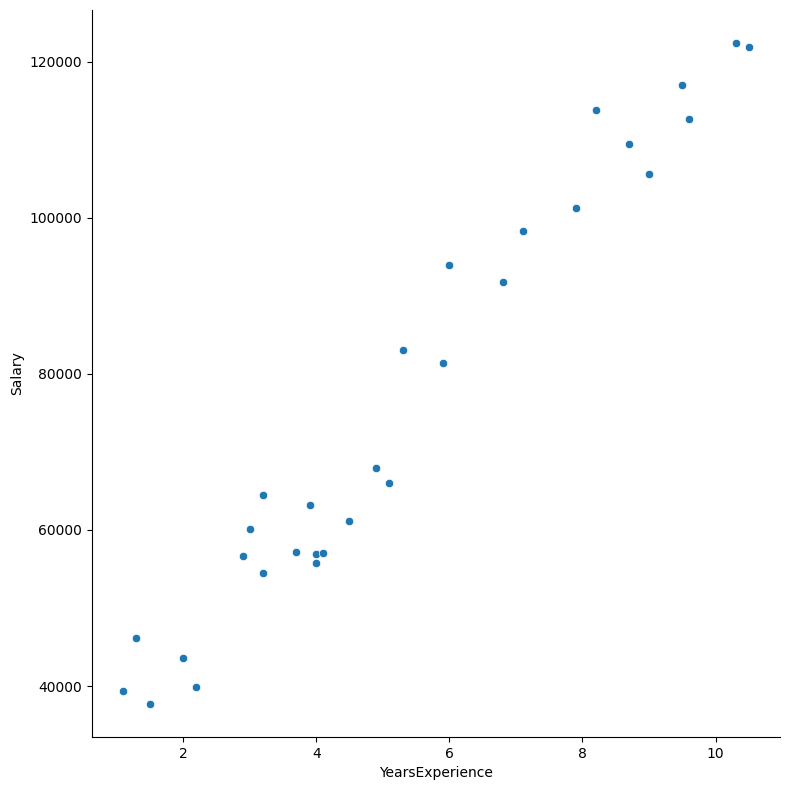

In [31]:
plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=8,kind='scatter')

In [32]:
x = data.iloc[: , :-1]
y = data.iloc[: , 1]

In [33]:
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)


In [34]:
my_model =LinearRegression()
my_model.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


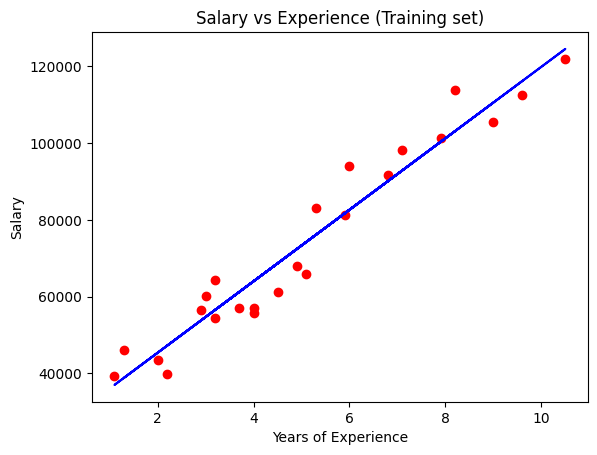

In [35]:
plt.scatter(x_train, y_train, color = 'red')
#! here y axis= y_hat(y predicted) based on x 
plt.plot(x_train, my_model.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Testing phase**

In [36]:
y_pred = my_model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

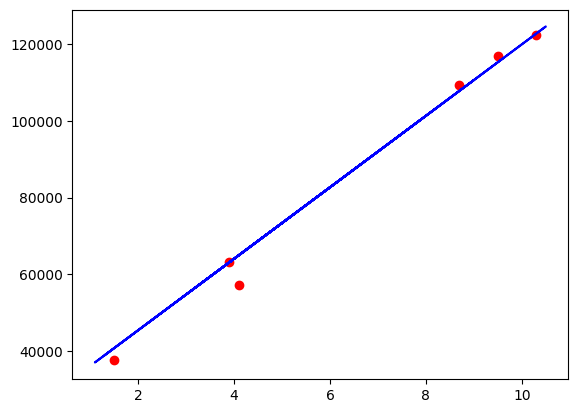

In [37]:
#scatter is the test data
plt.scatter(x_test, y_test, color = 'red')
#plot is the line based on training data and how near is he from it 
plt.plot(x_train, my_model.predict(x_train), color='blue')

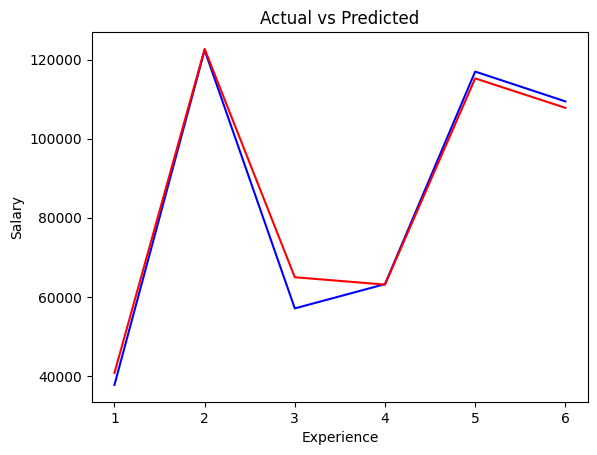

In [38]:
c = [i for i in range (1 , len(y_test)+1 )]
plt.plot(c , y_test , color = 'blue')
plt.plot (c , y_pred , color = 'red')
plt.title('Actual vs Predicted') 
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [39]:
#
mse=mean_squared_error(y_test,y_pred)
mse

12823412.298126549

In [40]:
 #* b in the equation wx+b=y
my_model.intercept_

np.float64(26780.09915062818)

In [41]:
 #* w in the equation wx+b=y
my_model.coef_

array([9312.57512673])

In [42]:
#here i can give him any thing to predict 
y_hat=my_model.coef_*2.0+my_model.intercept_
print(y_hat)
data.head()

[45405.24940409]


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
print(f'mean squared error: {mse}')
mae=mean_absolute_error(y_test,y_pred)
print(f'mean absolute error: {mae}')

#root square error , the gap between the y(y train) and y_hat(y prediction)
rmse=np.sqrt(mse)
print(f'root mse: {rmse}')

# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

# Intecept and coeff of the line
print('Intercept of the model(b):',my_model.intercept_)
print('Coefficient of the lin(w):',my_model.coef_)
 
y_hat = 9357 * 7 +  26089
print(y_hat)

mean squared error: 12823412.298126549
mean absolute error: 2446.1723690465055
root mse: 3580.979237321343
mean squared error : 12823412.298126549
r square : 0.988169515729126
Intercept of the model(b): 26780.09915062818
Coefficient of the lin(w): [9312.57512673]
91588


In [44]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model

In [45]:
poly=PolynomialFeatures(degree=8)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.transform(x_test)

In [46]:
poly_model=LinearRegression()
poly_model.fit(x_poly_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_poly_predict=poly_model.predict(x_poly_train)

In [48]:
y_poly_test=poly_model.predict(x_poly_test)

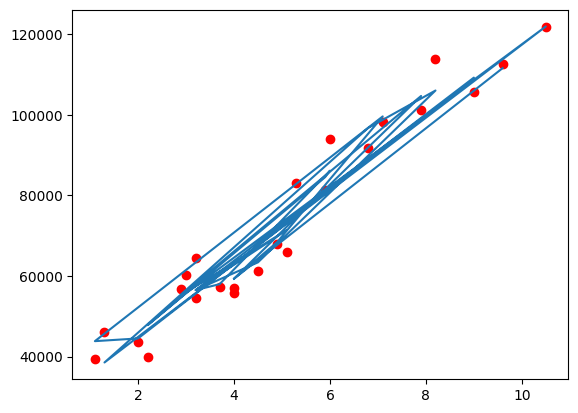

In [49]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,y_poly_predict)

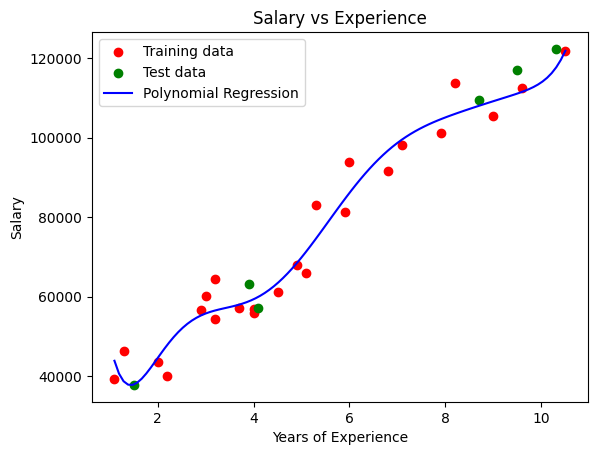

In [50]:

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)
 
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_range, y_range_pred, color='blue', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
 

In [55]:
# data.describe()
corr=data.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000
